# Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, KFold,cross_val_score,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA , IncrementalPCA
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification
from scipy import stats
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')
#!pip install xgboost
#!pip install plot_metric
#!pip install hyperopt

# Reading and Understanding Data

In [2]:
# Read the training dataset
train_df = pd.read_csv("train.csv")
train_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [3]:
#Check shape
print(train_df.shape)

(69999, 172)


In [4]:
# Check description
train_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


# Data Cleaning

In [5]:
# Identify the date columns
date_cols = [k for k in train_df.columns.to_list() if 'date' in k]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [6]:
#Drop Date Columns
train_df=train_df.drop(date_cols,axis=1)

In [7]:
# Identify the Recharge columns
recharge_cols = [k for k in train_df.columns.to_list() if 'rech' in k]
recharge_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

# Handling missing values

In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their number that month.

In [8]:
# Impute Recharge columns with 0
for col in recharge_cols:
    train_df[col]=train_df[col].fillna(0)

In [9]:
# Cheking percent of missing values in columns
df_missing_columns = (100*(train_df.isnull().sum()/len(train_df.index)).to_frame('null')).sort_values('null',ascending=False)
df_missing_columns

,null
night_pck_user_6,74.902499
arpu_3g_6,74.902499
arpu_2g_6,74.902499
fb_user_6,74.902499
fb_user_7,74.478207
...,...
total_rech_data_6,0.000000
last_day_rch_amt_8,0.000000
last_day_rch_amt_7,0.000000
last_day_rch_amt_6,0.000000


In [10]:
# List the columns having more than 50% missing values
col_list_missing_50 = list(df_missing_columns.index[df_missing_columns['null'] > 10])
col_list_missing_50

['night_pck_user_6',
 'arpu_3g_6',
 'arpu_2g_6',
 'fb_user_6',
 'fb_user_7',
 'arpu_3g_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'arpu_3g_8',
 'arpu_2g_8',
 'fb_user_8',
 'night_pck_user_8']

In [11]:
# Drop the columns having more than 50% missing values
train_df = train_df.drop(col_list_missing_50, axis=1)

In [12]:
#Check shape
train_df.shape

(69999, 151)

In [13]:
# Cheking again missing values in columns
df_missing_columns = train_df.isnull().sum().to_frame('null').sort_values('null',ascending=False)
df_missing_columns

,null
isd_og_mou_8,3703
std_og_t2c_mou_8,3703
std_ic_t2t_mou_8,3703
loc_og_t2t_mou_8,3703
loc_og_t2m_mou_8,3703
...,...
total_rech_data_7,0
total_rech_data_8,0
max_rech_data_6,0
max_rech_data_7,0


In [14]:
# drop columns with more than 3000 missing values
col_list_3000 = list(df_missing_columns.index[df_missing_columns['null'] >=3000])

In [15]:
# Drop the columns having more 3000+ missing values
train_df = train_df.drop(col_list_3000, axis=1)

In [16]:
# Check the shape
train_df.shape

(69999, 122)

In [17]:
# Checking columns with unique values
unique_value_cols=train_df.nunique(dropna=True).to_frame('Unique_Values').sort_values('Unique_Values',ascending=True)
unique_value_cols

,Unique_Values
std_ic_t2o_mou_7,1
circle_id,1
loc_og_t2o_mou,1
std_og_t2o_mou,1
loc_ic_t2o_mou,1
...,...
total_og_mou_7,33195
arpu_8,60194
arpu_7,61425
arpu_6,61615


In [18]:
# drop columns with unique values
unique_cols = list(unique_value_cols.index[unique_value_cols['Unique_Values'] ==1])
train_df = train_df.drop(unique_cols, axis=1)

In [19]:
# Checking shape
train_df.shape

(69999, 114)

In [20]:
# Cheking again missing values in columns
df_missing_columns = train_df.isnull().sum().to_frame('null').sort_values('null',ascending=False)
df_missing_columns

,null
og_others_6,2768
loc_og_t2f_mou_6,2768
loc_ic_t2m_mou_6,2768
loc_ic_t2f_mou_6,2768
spl_og_mou_6,2768
...,...
total_rech_data_8,0
max_rech_data_6,0
max_rech_data_7,0
max_rech_data_8,0


In [21]:
# Since there are more number of null values we are dropping cols greater than 2678
col_list_2678 = list(df_missing_columns.index[df_missing_columns['null'] >=2678])
train_df = train_df.drop(col_list_2678, axis=1)

In [22]:
#Check shape
train_df.shape

(69999, 60)

In [23]:
# Cheking again missing values in columns
df_missing_columns = train_df.isnull().sum().to_frame('null').sort_values('null',ascending=False)
df_missing_columns

,null
id,0
arpu_6,0
count_rech_3g_7,0
count_rech_3g_8,0
av_rech_amt_data_6,0
av_rech_amt_data_7,0
av_rech_amt_data_8,0
vol_2g_mb_6,0
vol_2g_mb_7,0
vol_2g_mb_8,0


In [24]:
# Checking again columns with unique values
unique_value_cols=train_df.nunique(dropna=True).to_frame('Unique_Values').sort_values('Unique_Values',ascending=True)
unique_value_cols

,Unique_Values
churn_probability,2
monthly_2g_6,5
monthly_2g_8,6
monthly_2g_7,6
monthly_3g_6,10
monthly_3g_8,12
monthly_3g_7,13
sachet_3g_6,23
count_rech_3g_6,23
sachet_3g_7,26


In [25]:
# drop columns with unique values
unique_cols = list(unique_value_cols.index[unique_value_cols['Unique_Values'] ==1])
train_df = train_df.drop(unique_cols, axis=1)

In [26]:
# Drop Id column which is not useful for analysis
train_df = train_df.drop('id', axis=1)

In [27]:
#Check the shape
train_df.shape

(69999, 59)

In [28]:
# Checking columns with unique values
unique_value_cols=train_df.nunique(dropna=True).to_frame('Unique_Values').sort_values('Unique_Values',ascending=True)
unique_value_cols

,Unique_Values
churn_probability,2
monthly_2g_6,5
monthly_2g_8,6
monthly_2g_7,6
monthly_3g_6,10
monthly_3g_8,12
monthly_3g_7,13
sachet_3g_6,23
count_rech_3g_6,23
sachet_3g_7,26


### Outlier Treatment

Z-score is a measure of how many standard deviations an observation or data point is from the mean. In this case, it is used to identify and remove outliers by considering data points with an absolute Z-score greater than 3 as outliers.

In [29]:
#Remove outliers
z = np.abs(stats.zscore(train_df))
selected = train_df[(z < 3).all(axis=1)]
train_df = train_df.loc[selected.index]

In [30]:
# Checking columns with unique values
unique_value_cols=train_df.nunique(dropna=True).to_frame('Unique_Values').sort_values('Unique_Values',ascending=True)
unique_value_cols.head()

,Unique_Values
monthly_2g_8,1
monthly_2g_7,1
monthly_2g_6,1
churn_probability,2
sachet_3g_7,2


In [31]:
# drop columns with unique values
unique_cols = list(unique_value_cols.index[unique_value_cols['Unique_Values'] ==1])
train_df = train_df.drop(unique_cols, axis=1)

In [32]:
#Check shape
train_df.shape

(47972, 56)

# Filter high-value customers

In [33]:
## calculate the total data recharge amount for June ,July and August --> number of recharges * average recharge amount
train_df['total_data_rech_amt_6']= train_df['total_rech_data_6'] * train_df['av_rech_amt_data_6']
train_df['total_data_rech_amt_7']= train_df['total_rech_data_7'] * train_df['av_rech_amt_data_7']
train_df['total_data_rech_amt_8']= train_df['total_rech_data_8'] * train_df['av_rech_amt_data_8']
train_df.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8
0,31.277,87.009,7.527,81.21,221.68,3.63,11.84,53.04,40.56,3,...,0,0,1958,0.0,0.0,0.0,0,0.0,0.0,0.0
1,0.000,122.787,42.953,0.00,30.73,31.66,3.44,39.44,25.04,3,...,0,0,710,0.0,0.0,0.0,0,0.0,145.0,0.0
2,60.806,103.176,0.000,56.49,99.36,0.00,124.29,33.83,36.64,2,...,0,0,882,0.0,0.0,0.0,0,0.0,0.0,0.0
3,156.362,205.260,111.095,76.03,95.98,53.84,95.11,50.18,83.84,2,...,0,0,982,0.0,0.0,0.0,0,0.0,0.0,0.0
5,86.193,83.351,88.462,18.54,41.76,3.89,271.29,383.51,209.43,9,...,0,0,698,0.0,0.0,0.0,0,0.0,0.0,0.0


### add total data recharge and total recharge to get total combined recharge amount for a month

In [34]:
# calculate total recharge amount for June, July and August --> call recharge amount + data recharge amount
train_df['total_rech_6'] = train_df['total_data_rech_amt_6'] + train_df['total_rech_amt_6']
train_df['total_rech_7'] = train_df['total_data_rech_amt_7'] + train_df['total_rech_amt_7']
train_df['total_rech_8'] = train_df['total_data_rech_amt_8'] + train_df['total_rech_amt_8']

In [35]:
#average for june july & August
train_df['total_rech_6_7_8']= train_df['total_rech_6'] + train_df['total_rech_7'] + train_df['total_rech_8']
round(train_df['total_rech_6_7_8'].mean(),2)

759.54

# Defining Churn variable(Target Variable)

##### create churn variable: those who have not used either calls or internet in the month of August are customers who have churned

we need to find the derive churn variable using total_ic_mou_8,total_og_mou_8,vol_2g_mb_8 and vol_3g_mb_8 attributes

In [36]:
#create new col churn
train_df['Churn']=0

In [37]:
# calculate total incoming and outgoing minutes of usage
train_df['total_calls_mou_8'] = train_df.total_ic_mou_8 + train_df.total_og_mou_8

# calculate 2g and 3g data consumption
train_df['total_internet_mb_8'] =  train_df.vol_2g_mb_8 + train_df.vol_3g_mb_8


In [38]:
# create churn variable: those who have not used either calls or internet in the month of August are customers who have churned

# 0 - not churn, 1 - churn
train_df['Churn'] = train_df.apply(lambda row: 1 if (row.total_calls_mou_8 == 0 and row.total_internet_mb_8 == 0) else 0, axis=1)


In [39]:
# delete derived variables
train_df = train_df.drop(['total_calls_mou_8', 'total_internet_mb_8'], axis=1)

In [40]:
# change data type to category
train_df.Churn = train_df.Churn.astype("category")
print("Churn Ratio:")
print(train_df.Churn.value_counts()*100/train_df.shape[0])

Churn Ratio:
0    90.903027
1     9.096973
Name: Churn, dtype: float64


# EDA

# Univariate analysis

<Axes: xlabel='Churn', ylabel='count'>

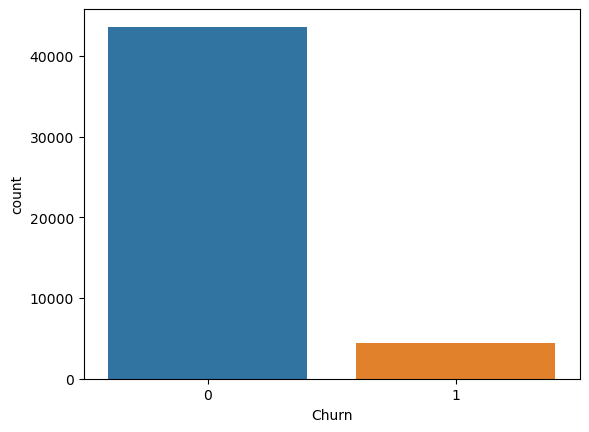

In [41]:
# Plot countplot for churn 
sns.countplot(x="Churn",data = train_df)

<b>Observation</b>:<br> Churn rate is low in overall data but need there is a class imbalance

<Axes: xlabel='aon', ylabel='Density'>

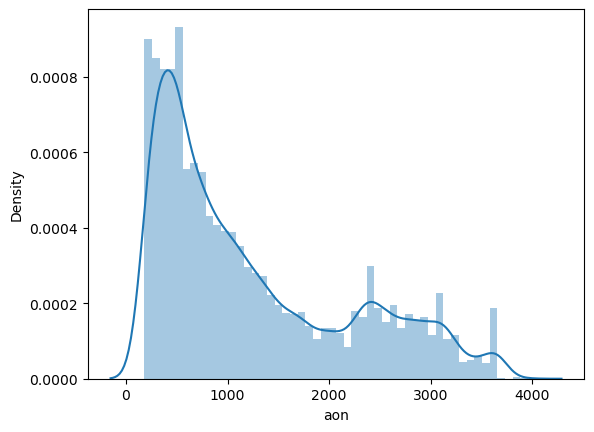

In [42]:
# Plot distplot for aon
sns.distplot(train_df['aon'])

<b>Observation:</b><br>The age of the network is Initially high but gradually decreases over the time

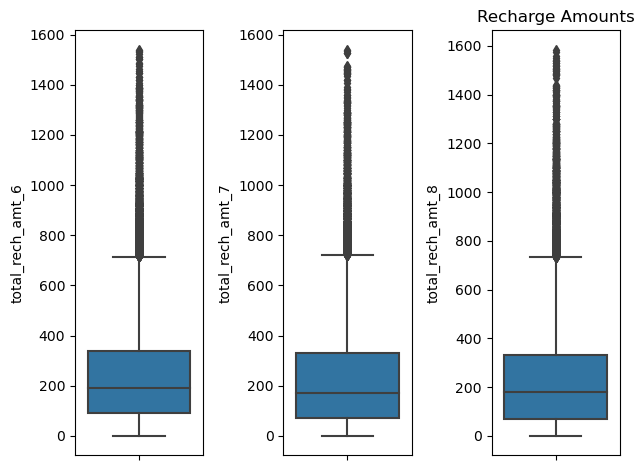

In [43]:
# Box plot for recharge amounts for 6,7,8 months
fig, axes = plt.subplots(1,3)

cols=['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
for name, ax in zip(cols, axes.flatten()):
    sns.boxplot(y=name , data=train_df, orient='h', ax=ax)
plt.title('Recharge Amounts')    
plt.tight_layout()

<b>Observation:</b><br> The median of recharge amounts is at 450

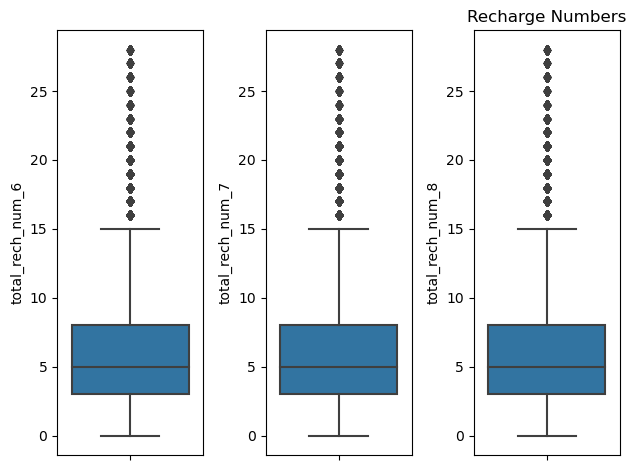

In [44]:
# Box plot for recharge Numbers for 6,7,8 months
fig, axes = plt.subplots(1,3)

cols=['total_rech_num_6','total_rech_num_7','total_rech_num_8']
for name, ax in zip(cols, axes.flatten()):
    sns.boxplot(y=name , data=train_df, orient='h', ax=ax)
plt.title('Recharge Numbers')    
plt.tight_layout()

<b>Observation:</b><br> The median of recharge numbers for 6,7,8 months  is 8

# Bivariate Analysis

Text(0.5, 0.98, 'Incoming Calls Usage')

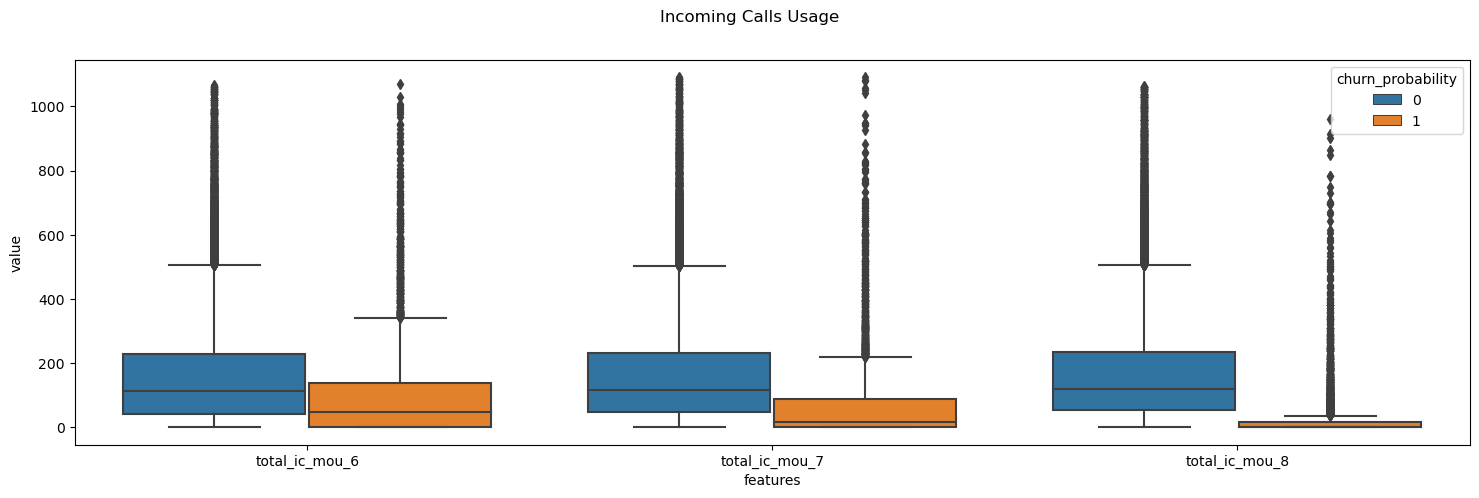

In [45]:
# Plot boxplot for incoming calls vs churn 
df_ic=train_df[["total_ic_mou_6","total_ic_mou_7","total_ic_mou_8","churn_probability"]]
plt.figure(figsize=(18, 5))
X = pd.melt(df_ic,id_vars="churn_probability",var_name="features",value_name='value')
sns.boxplot(x="features", y="value", hue="churn_probability",data = X)  
plt.suptitle('Incoming Calls Usage')

<b>Observation:</b><br> The churn probability based on incoming calls for the 6th month is high and is lowest for 8th month

Text(0.5, 0.98, 'Recharge Counts')

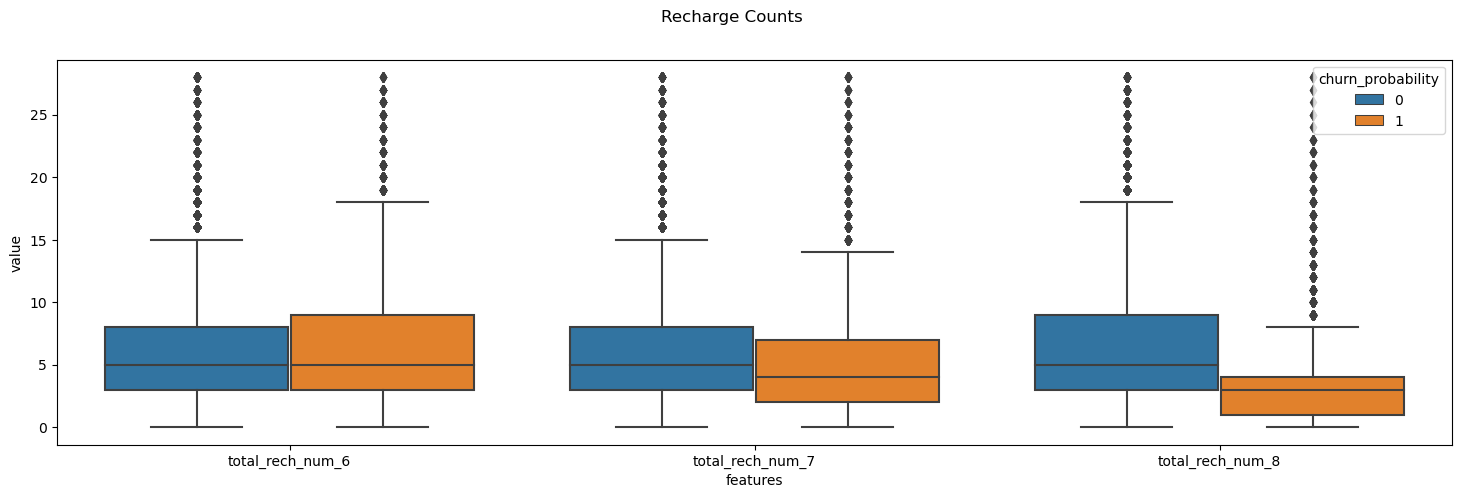

In [46]:
# Plot box plot between Recharge counts and Churn
df_ic=train_df[["total_rech_num_6","total_rech_num_7","total_rech_num_8","churn_probability"]]
plt.figure(figsize=(18, 5))
X = pd.melt(df_ic,id_vars="churn_probability",var_name="features",value_name='value')
sns.boxplot(x="features", y="value", hue="churn_probability",data = X)  
plt.suptitle('Recharge Counts')

<b>Observation:</b><br> The churn probability based on Number of Recharges for the 6th month is high and is lowest for 8th month

Text(0.5, 0.98, 'Recharge Counts')

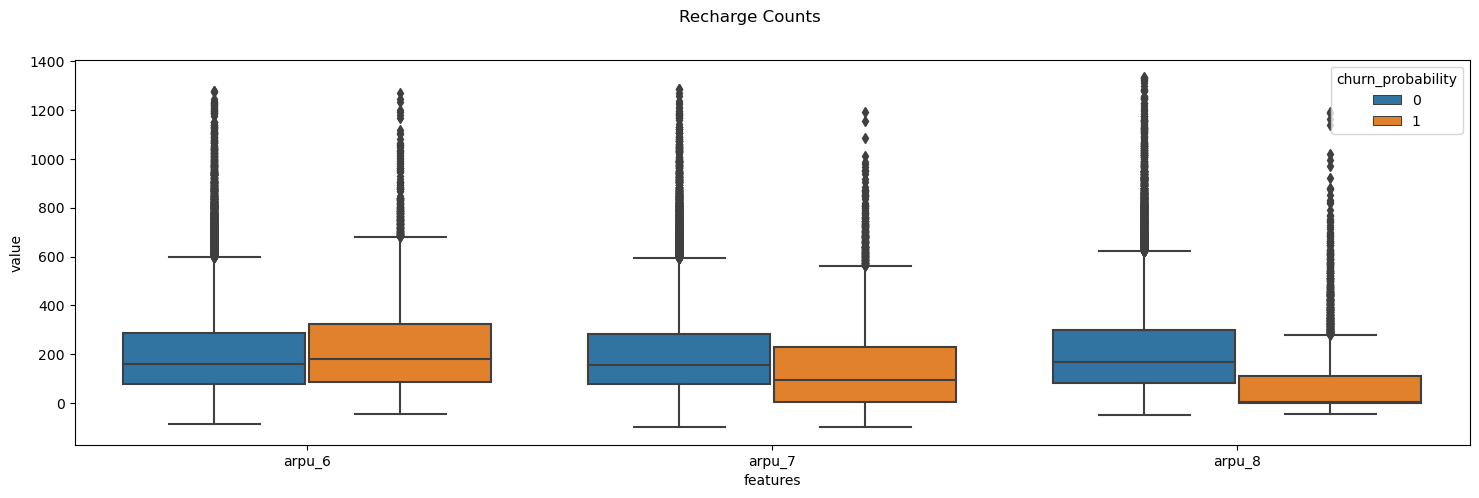

In [47]:
# Plot boxplot between arpu and churn 
df_ic=train_df[["arpu_6","arpu_7","arpu_8","churn_probability"]]
plt.figure(figsize=(18, 5))
X = pd.melt(df_ic,id_vars="churn_probability",var_name="features",value_name='value')
sns.boxplot(x="features", y="value", hue="churn_probability",data = X)  
plt.suptitle('Recharge Counts')

<b>Observation:</b><br> The churn probability based on average revenue per user for the 6th month is high and is lowest for 8th month

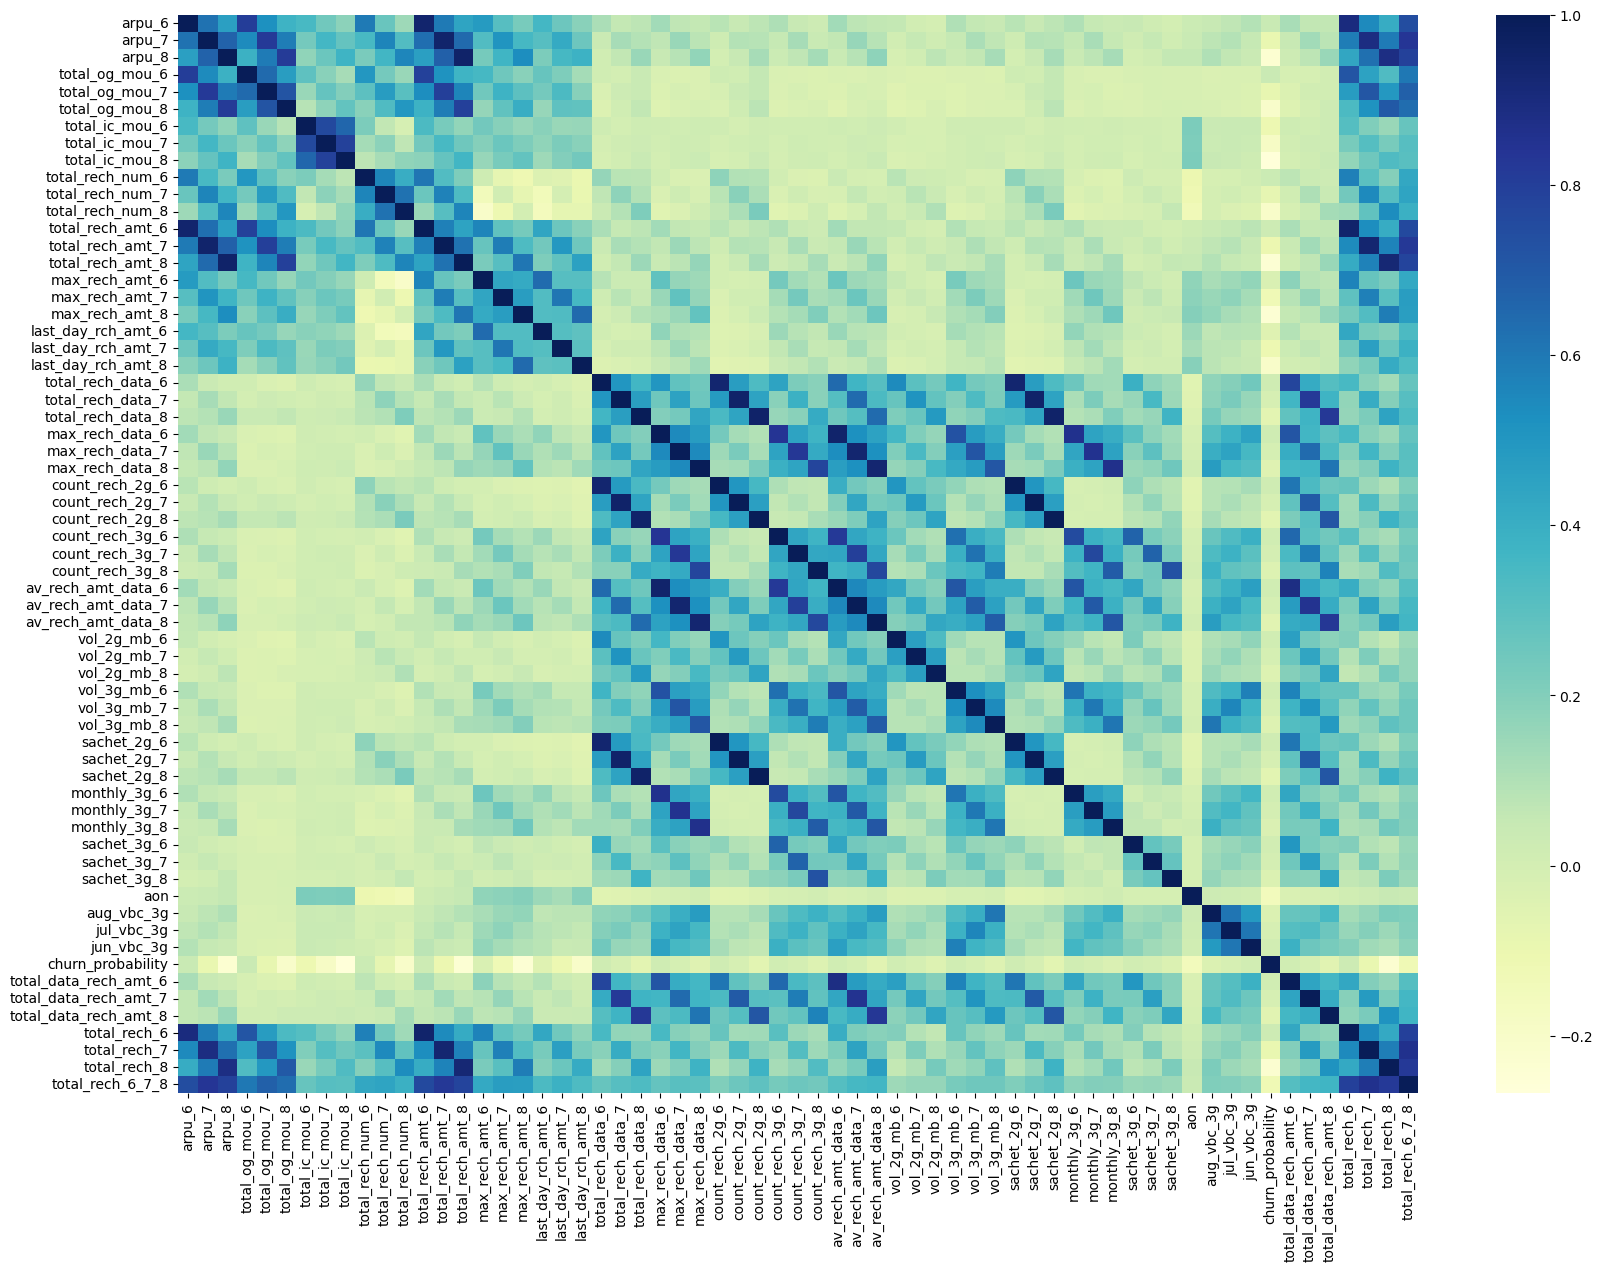

In [48]:
# Heatmap
plt.figure(figsize = (20,14))
sns.heatmap(train_df.corr(),cmap="YlGnBu", annot=False)
plt.show()

<b>Observation:</b><br> The above heathmap shows there are strong correlations between the total incoming calls for 6,7,8 months, arpu6,arpu7, and vb_3g for months of June,July ,August

In [49]:
#dropping unwanted cols
train_df=train_df.drop(columns=['churn_probability','total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'],axis=1)

# Train-Test Split

In [50]:
# Separate Features and target variables
X=train_df.iloc[:,:-1]
y=train_df['Churn']

In [51]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Data resampling for balancing data

In [52]:
# Instantiate SMOTE
sm = SMOTE(random_state=42)

In [53]:
# Fit SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

In [54]:
X_train.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,max_rech_amt_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7_8
0,155.170,-5.000,2.500,286.29,0.00,0.00,59.08,0.00,0.00,50,...,0.0,0.0,0.0,0.0,0.0,0.0,170.0,0.0,0.0,170.0
1,91.300,113.764,73.781,120.31,145.88,92.04,159.83,174.51,75.16,30,...,0.0,0.0,0.0,0.0,0.0,0.0,106.0,120.0,90.0,316.0
2,591.520,241.930,58.500,357.96,210.23,0.00,1069.24,633.14,0.00,200,...,0.0,0.0,0.0,0.0,0.0,0.0,400.0,350.0,0.0,750.0
3,29.969,105.287,54.394,20.58,28.94,28.11,9.03,13.98,6.78,20,...,0.0,0.0,0.0,0.0,0.0,0.0,20.0,140.0,60.0,220.0
4,366.158,411.051,296.316,540.39,669.03,561.64,488.54,543.49,508.03,339,...,0.0,0.0,0.0,0.0,0.0,0.0,539.0,639.0,967.0,2145.0


# Feature Scaling

In [55]:
# Instantiate the Scaler
scaler = StandardScaler()
# Fit the data into scaler and transform
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [56]:
# Transform val/Testset
X_test[X_train.columns] = scaler.transform(X_test[X_train.columns])

# Feature Selection/Importance

In [57]:
# Use Randomforest for feature selection
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [58]:
sel.get_support()

array([False, False,  True, False,  True,  True, False,  True,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False])

In [59]:
# Check number of important features selected by randomforest
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

8

In [60]:
# Display Important features
print(selected_feat)

Index(['arpu_8', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'total_rech_8'],
      dtype='object')


In [61]:
sel.get_support(indices=True)

array([ 2,  4,  5,  7,  8, 11, 14, 54], dtype=int64)

In [62]:
df_feature_imp=pd.DataFrame()
df_feature_imp['Feature']=selected_feat
df_feature_imp['Score']=[sel.estimator_.feature_importances_.ravel()[i] for i in sel.get_support(indices=True)]

Text(0.5, 1.0, 'Feature Importance')

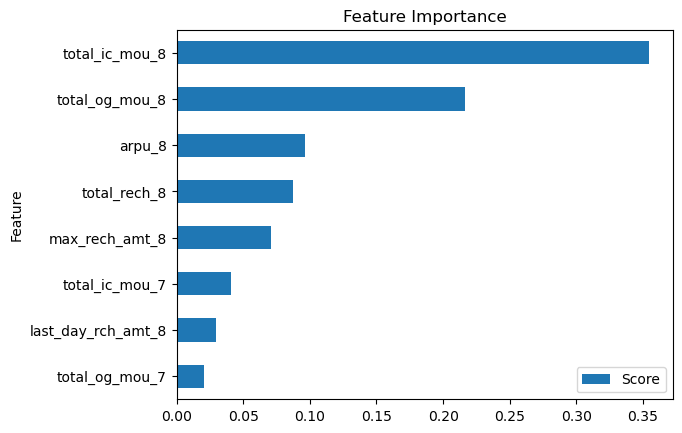

In [63]:
df_feature_imp.sort_values(by='Score').plot.barh(x='Feature',y='Score')
plt.title('Feature Importance')

### We noticed that the following 5 factors affect the churn rate considerably -
1) Total Incoming Minutes of usage in the August

2) Total Outgoing Minutes of usage in the August

3) ARPU in August(Average revenue per user)

4) Total Recharge in August

5) Total Incoming Minutes of usage in the July

Also these metrics are inversely proportion to churn which means that we need to come up with campaigns that would keep people engaged either via calls (incoming) or on internet. One interesting thing to note here is that we see that a lot of people are hooked on 2G and hence are not churning. It presents us with a great opportunity that if shift these people from 2g to 3g then we have a greater chance of these people not churning. Hence discounts on 3G pack can be one of the popular marketing campaigns

# Logistic Regression without PCA using Feature selection

In [64]:
# Will create a function and call it again and again for different models
def model_evaluation(actual, pred):
    # Accuracy Score
    acc_score = round(accuracy_score(actual, pred)*100,2)
    
    # Precision score
    prec_score = round(precision_score(actual, pred)*100,2)
    
    # Recall score
    rec_score = round(recall_score(actual, pred)*100,2)
    
    # Confusion matrix
    confusion = confusion_matrix(actual, pred)
   
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    # Specificity
    Specificity= round(TN / float(TN+FP),2)
    # ROC AUC score
    roc_score = round(roc_auc_score(actual, pred)*100,2)
    #F1-Score
    f1_score=round(2*((prec_score*rec_score)/(prec_score+rec_score)),2)
    return {"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Recall":rec_score,"Precision":prec_score,"Specificity":Specificity,"ROC/AUC Score":roc_score,"F1-Score":f1_score,"Accuracy":acc_score}

In [65]:
# Build Logistic Regression using important features
X_New_train= X_train[selected_feat]
# Initialize the Logistic regression
model1 = LogisticRegression(random_state=42)
# fit the training data
model1.fit(X_New_train, y_train)
# predict the training data
Y_train_pred = model1.predict(X_New_train)
# predict the testing data
Y_test_pred = model1.predict(X_test[selected_feat])
# Model evaluation
train_eval=pd.DataFrame([model_evaluation(y_train, Y_train_pred)])
test_eval=pd.DataFrame([model_evaluation(y_test, Y_test_pred)])
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)

##### Model Summary 

In [66]:
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,ROC/AUC Score,F1-Score,Accuracy
data,,,,,,,,,,
train_data,34878,33743,1156,21,99.94,96.79,0.97,98.31,98.34,98.31
test_data,886,8447,262,0,100.00,77.18,0.97,98.50,87.12,97.27


# PCA

In [67]:
# initialize the pca with randomized
pca = PCA( random_state=42)
# fit the training dataset
pca.fit(X_train)

PCA(random_state=42)

In [68]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [69]:
# Principal components
pca.components_

array([[ 6.64341894e-02,  1.14801610e-01,  1.15127135e-01, ...,
         1.65101119e-01,  1.58253285e-01,  1.90034270e-01],
       [ 1.62240726e-01,  2.67031442e-01,  2.67353315e-01, ...,
         2.13940652e-01,  2.24884451e-01,  2.39504421e-01],
       [-7.05032309e-02, -3.08622047e-02,  7.21947912e-03, ...,
         2.67044220e-03,  6.11281557e-02, -1.11969674e-02],
       ...,
       [ 0.00000000e+00, -4.06459904e-16,  5.58794059e-16, ...,
         5.42215822e-02,  5.40048599e-02, -1.27840662e-01],
       [ 0.00000000e+00, -1.33547742e-16,  4.89822781e-17, ...,
        -2.36462851e-01, -2.35517715e-01,  5.57519094e-01],
       [ 0.00000000e+00, -1.89494928e-16,  2.29655877e-16, ...,
        -1.31950512e-01, -1.31423109e-01,  3.11105654e-01]])

In [70]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
variance_cumu

array([0.22944506, 0.35385061, 0.44371506, 0.52033724, 0.57989867,
       0.62416289, 0.65652884, 0.68699586, 0.71471071, 0.74031143,
       0.76420174, 0.78672691, 0.80703928, 0.82655366, 0.84236753,
       0.85635715, 0.87011146, 0.88194077, 0.8924869 , 0.90201585,
       0.91132924, 0.91953537, 0.92755416, 0.93497053, 0.94187964,
       0.94840431, 0.95407198, 0.9594119 , 0.96432828, 0.96876664,
       0.97271259, 0.97638387, 0.97986493, 0.98272016, 0.98526822,
       0.9875865 , 0.98982222, 0.99165243, 0.99315068, 0.99449542,
       0.99578572, 0.9966796 , 0.99751988, 0.99821141, 0.99877346,
       0.99924406, 0.99954711, 0.999705  , 0.99981003, 0.99988955,
       0.99996621, 1.        , 1.        , 1.        , 1.        ,
       1.        ])

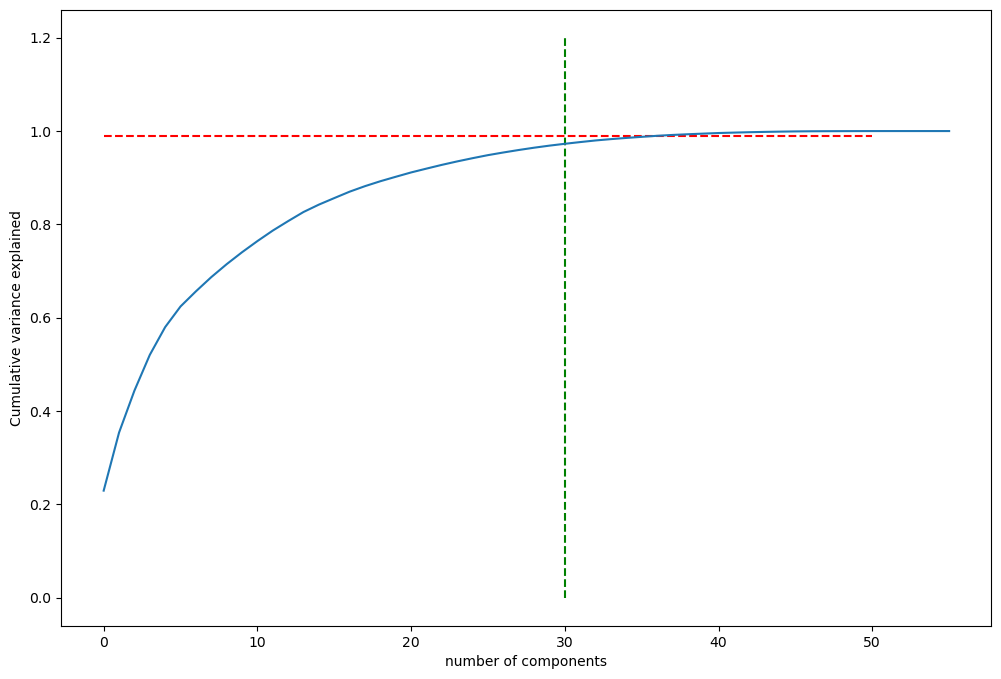

In [71]:
#Screeplot for the PCA components
fig = plt.figure(figsize=[12,8])
plt.vlines(x=30, ymax=1.2, ymin=0, colors="g", linestyles="--")
plt.hlines(y=0.99, xmax=50, xmin=0, colors="r", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Cumulative variance explained')
plt.show()

In [72]:
# Instantiate PCA with 30 components
pca_final = IncrementalPCA(n_components=30)

In [73]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

In [74]:
X_train_pca.shape

(69798, 30)

In [75]:
# Transofrm test data wtih pca
X_test_pca = pca_final.transform(X_test)

# Logistic regression with PCA

In [76]:
# Creating KFold object with 10 splits
folds = KFold(n_splits=10, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]} #C= regularization parameter

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)


Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [77]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.141389,0.017140,0.003302,0.005537,0.01,{'C': 0.01},0.979306,0.976333,0.972191,0.977419,...,0.976446,0.976595,0.976324,0.976532,0.975986,0.976196,0.976463,0.976276,0.976421,0.000218
1,0.173923,0.018705,0.001601,0.004804,0.1,{'C': 0.1},0.979889,0.980040,0.973893,0.977126,...,0.978167,0.978215,0.977790,0.978251,0.978025,0.978047,0.978372,0.978028,0.978134,0.000156
2,0.206901,0.014458,0.002163,0.004643,1,{'C': 1},0.978432,0.980610,0.971907,0.976540,...,0.977402,0.977262,0.977248,0.977137,0.976974,0.977249,0.977417,0.977327,0.977252,0.000122
3,0.198420,0.009134,0.003814,0.006065,10,{'C': 10},0.978432,0.980610,0.972191,0.976246,...,0.977307,0.977167,0.977153,0.977009,0.976751,0.977185,0.977385,0.977200,0.977156,0.000175
4,0.205709,0.011911,0.002015,0.004734,100,{'C': 100},0.978432,0.980895,0.972191,0.976246,...,0.977275,0.977135,0.977089,0.977009,0.976719,0.977153,0.977385,0.977136,0.977128,0.000176
5,0.207438,0.009341,0.003364,0.006170,1000,{'C': 1000},0.978432,0.980895,0.972191,0.976246,...,0.977275,0.977135,0.977089,0.977009,0.976719,0.977153,0.977385,0.977136,0.977128,0.000176


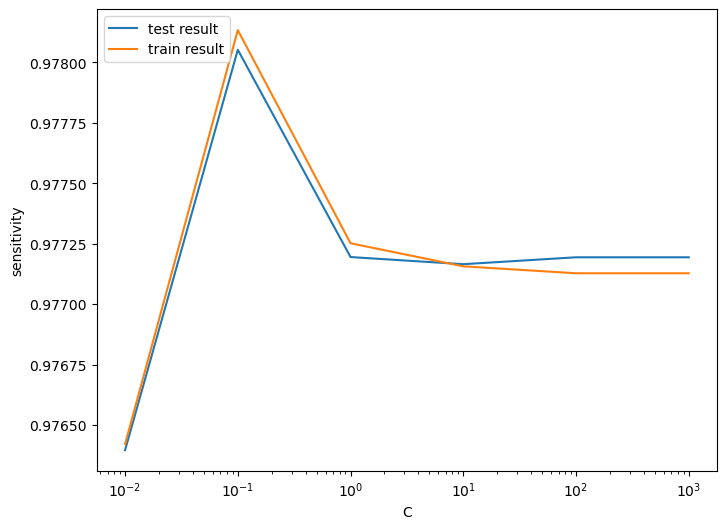

In [78]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [79]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9780522552624072 at C = 0.1


In [80]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(class_weight='balanced',C=best_C)

# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

# predict the training data
Y_train_pred = log_pca_model.predict(X_train_pca)
# predict the testing data
Y_test_pred = log_pca_model.predict(X_test_pca)
# Model evaluation
train_eval=pd.DataFrame([model_evaluation(y_train, Y_train_pred)])
test_eval=pd.DataFrame([model_evaluation(y_test, Y_test_pred)])
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)

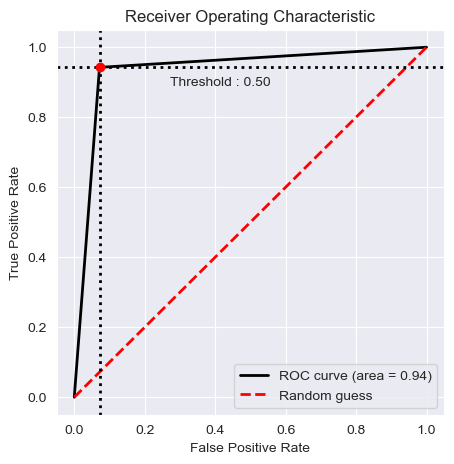

In [81]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, Y_test_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [82]:
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,ROC/AUC Score,F1-Score,Accuracy
data,,,,,,,,,,
train_data,34131,32317,2582,768,97.80,92.97,0.93,95.20,95.32,95.20
test_data,835,8085,624,51,94.24,57.23,0.93,93.54,71.21,92.97


# Decision Tree Model

In [83]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(10,20,10),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced',random_state=42)

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': range(10, 20, 10),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [84]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.292866,0.099267,0.009452,0.007719,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.911175,0.928797,0.946848,0.938825,0.935378,0.932204,0.012018,1
1,2.398628,0.062523,0.008742,0.006148,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.911175,0.928797,0.946848,0.938825,0.935378,0.932204,0.012018,1
2,2.224794,0.123490,0.001631,0.002211,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.897278,0.920917,0.930802,0.922923,0.933228,0.921030,0.012744,3
3,2.208728,0.029514,0.006447,0.005072,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.897278,0.920917,0.930802,0.922923,0.933228,0.921030,0.012744,3


In [85]:
# Printing the optimal sensitivity score and hyperparameters
print("Best score:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best score:- 0.9322044520791192
DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=50, min_samples_split=50,
                       random_state=42)


In [86]:
# Instantiate the model with best C
dt_pca = DecisionTreeClassifier(class_weight='balanced', criterion = "gini",max_depth=10,
                       min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

# Fit the model on the train set
dt_pca_model = dt_pca.fit(X_train_pca, y_train)

# predict the training data
Y_train_pred = dt_pca_model.predict(X_train_pca)
# predict the testing data
Y_test_pred = dt_pca_model.predict(X_test_pca)
# Model evaluation
train_eval=pd.DataFrame([model_evaluation(y_train, Y_train_pred)])
test_eval=pd.DataFrame([model_evaluation(y_test, Y_test_pred)])
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)

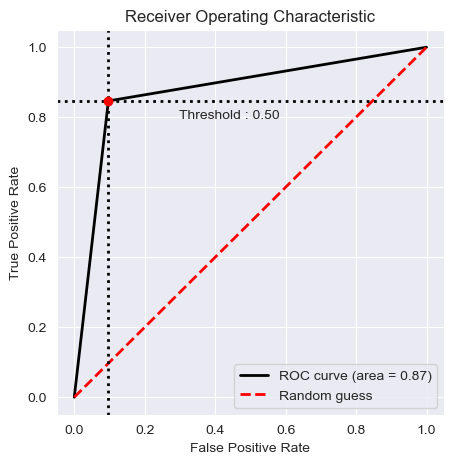

In [87]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, Y_test_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [88]:
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,ROC/AUC Score,F1-Score,Accuracy
data,,,,,,,,,,
train_data,32939,31886,3013,1960,94.38,91.62,0.91,92.88,92.98,92.88
test_data,750,7866,843,136,84.65,47.08,0.90,87.49,60.51,89.80


# RandomForest Model

In [89]:
param_grid = {
    'max_depth': [4,8,12,16,20],
    'min_samples_leaf': range(10, 20, 30),
    'min_samples_split': range(10, 30, 50),
    'n_estimators': [5,10,15,20], 
    'max_features': [5, 10, 15]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           verbose = 1, 
                           scoring='recall',
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [4, 8, 12, 16, 20],
                         'max_features': [5, 10, 15],
                         'min_samples_leaf': range(10, 20, 30),
                         'min_samples_split': range(10, 30, 50),
                         'n_estimators': [5, 10, 15, 20]},
             return_train_score=True, scoring='recall', verbose=1)

In [90]:
print("Best Score",grid_search.best_score_)
print("Best Params",grid_search.best_params_)

Best Score 0.9724920484827647
Best Params {'max_depth': 12, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 20}


In [91]:
# Instantiate the model with best C
rfc_pca = RandomForestClassifier(class_weight='balanced',
                             max_depth=16,
                             min_samples_leaf=10, 
                             min_samples_split=10,
                             max_features=15,
                             n_estimators=20,
                       random_state=42)

# Fit the model on the train set
rfc_pca_model = rfc_pca.fit(X_train_pca, y_train)

# predict the training data
Y_train_pred = rfc_pca_model.predict(X_train_pca)
# predict the testing data
Y_test_pred = rfc_pca_model.predict(X_test_pca)
# Model evaluation
train_eval=pd.DataFrame([model_evaluation(y_train, Y_train_pred)])
test_eval=pd.DataFrame([model_evaluation(y_test, Y_test_pred)])
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)

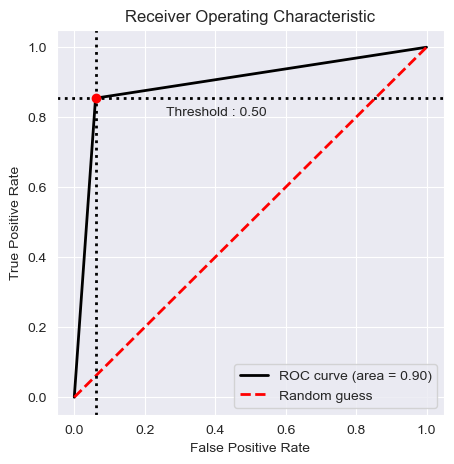

In [92]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, Y_test_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [93]:
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,ROC/AUC Score,F1-Score,Accuracy
data,,,,,,,,,,
train_data,34620,33479,1420,279,99.20,96.06,0.96,97.57,97.6,97.57
test_data,757,8183,526,129,85.44,59.00,0.94,89.70,69.8,93.17


# XGBOOST Model

In [94]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [95]:
space={'max_depth': hp.quniform("max_depth", 3, 20, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 500,
        'seed': 42,

    }

In [96]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train_pca, y_train), ( X_test_pca, y_test)]
    
    clf.fit(X_train_pca, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [97]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                                                                                 
0.8703491401771756                                                                                                     
SCORE:                                                                                                                 
0.8684731631057843                                                                                                     
SCORE:                                                                                                                 
0.8802501302761855                                                                                                     
SCORE:                                                                                                                 
0.8714955706096925                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.8690984887962481                                                                                                     
SCORE:                                                                                                                 
0.8723293381969776                                                                                                     
SCORE:                                                                                                                 
0.88264721208963                                                                                                       
SCORE:                                                                                                                 
0.8746221990620114                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.8739968733715476                                                                                                     
SCORE:                                                                                                                 
0.8810838978634705                                                                                                     
SCORE:                                                                                                                 
0.8735799895779052                                                                                                     
SCORE:                                                                                                                 
0.8562793121417405                                                                                                     
SCORE:                                  

In [98]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.9906728966091379, 'gamma': 8.996256504493923, 'max_depth': 13.0, 'min_child_weight': 8.0, 'reg_alpha': 46.0, 'reg_lambda': 0.7590798290980385}


In [99]:
# Instantiate the model with best C
xgb_pca = XGBClassifier(objective = 'binary:logistic',
                         colsample_bytree=0.6112047871482581,
                            max_depth= 8,
                            min_child_weight= 6.0,
                            reg_alpha=40.0,
                            seed= 42,
                            gamma= 5.497570740967257,
                            reg_lambda=0.7032347446079391,
                           
                        )

# Fit the model on the train set
xgb_pca_model = xgb_pca.fit(X_train_pca, y_train)

# predict the training data
Y_train_pred = xgb_pca_model.predict(X_train_pca)
# predict the testing data
Y_test_pred = xgb_pca_model.predict(X_test_pca)
# Model evaluation
train_eval=pd.DataFrame([model_evaluation(y_train, Y_train_pred)])
test_eval=pd.DataFrame([model_evaluation(y_test, Y_test_pred)])
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)

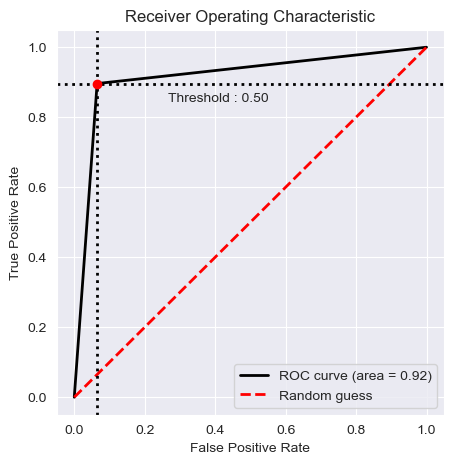

In [100]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, Y_test_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [101]:
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,ROC/AUC Score,F1-Score,Accuracy
data,,,,,,,,,,
train_data,34350,32889,2010,549,98.43,94.47,0.94,96.33,96.41,96.33
test_data,794,8144,565,92,89.62,58.43,0.94,91.56,70.74,93.15


<b>Observation:</b><br> Of all the models XGBoost with PCA has better accuracy on unseen data compared to other models with unseen data accuracy around 0.89

# Model prediction on Unseen Data

In [102]:
# Load the unseen data
unseen_data=pd.read_csv('test.csv')
unseen_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


### Test Data preparation

In [103]:
unseen_data['total_data_rech_amt_6']= unseen_data['total_rech_data_6'] * unseen_data['av_rech_amt_data_6']
unseen_data['total_data_rech_amt_7']= unseen_data['total_rech_data_7'] * unseen_data['av_rech_amt_data_7']
unseen_data['total_data_rech_amt_8']= unseen_data['total_rech_data_8'] * unseen_data['av_rech_amt_data_8']
unseen_data['total_rech_6'] = unseen_data['total_data_rech_amt_6'] + unseen_data['total_rech_amt_6']
unseen_data['total_rech_7'] = unseen_data['total_data_rech_amt_7'] + unseen_data['total_rech_amt_7']
unseen_data['total_rech_8'] = unseen_data['total_data_rech_amt_8'] + unseen_data['total_rech_amt_8']
unseen_data['total_rech_6_7_8']= unseen_data['total_rech_6'] + unseen_data['total_rech_7'] + unseen_data['total_rech_8']

In [104]:
# Identify the Recharge columns
recharge_cols = [k for k in train_df.columns.to_list() if 'rech' in k]
# Impute Recharge columns with 0
for col in recharge_cols:
    unseen_data[col]=unseen_data[col].fillna(0)

In [105]:
# Select the columns used in train data
unseen_df=unseen_data[X_train.columns]
unseen_df[unseen_df.columns]=scaler.transform(unseen_df[unseen_df.columns])

In [106]:
# Transofrm test data wtih pca
unseen_data_pca = pca_final.transform(unseen_df)

In [107]:
preds=xgb_pca_model.predict(unseen_data_pca)

# Save the Predictions

In [108]:
sample=pd.read_csv('sample.csv')

In [109]:
sample['churn_probability']=preds#Y_unseen_pred

In [110]:
sample.to_csv('Submission_final_xgb.csv',index=False)